In [6]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def ler_log_para_dataframe(caminho_log):
    linhas = []
    with open(caminho_log, 'r', encoding='latin1') as f:
        for linha in f:
            match = re.search(r'\[(.*?)\] IP: (.*?) \| Status: (.*?) \| Iluminação: ([\d.]+) \| Reconhecido: (sim|não)(?: \| Usuário: (.*?)(?: \(([\d.]+)%\))?)?', linha)
            if match:
                timestamp_str = match.group(1)
                timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                ip = match.group(2)
                status = match.group(3)
                iluminacao = float(match.group(4))
                reconhecido = match.group(5)
                usuario = match.group(6) if match.group(6) else None
                confianca = float(match.group(7)) if match.group(7) else None

                linhas.append({
                    'timestamp': timestamp,
                    'ip': ip,
                    'status': status,
                    'iluminacao': iluminacao,
                    'reconhecido': reconhecido,
                    'usuario': usuario,
                    'confianca': confianca
                })

    df = pd.DataFrame(linhas)
    return df


In [16]:
df = ler_log_para_dataframe('./src/logs/reconhecimento.log')
df.head()

,timestamp,ip,status,iluminacao,reconhecido,usuario,confianca
0,2025-08-31 22:42:12,10.0.0.190,no_face,31.29,não,None,None
1,2025-08-31 22:42:13,10.0.0.190,no_face,31.32,não,None,None
2,2025-08-31 22:42:14,10.0.0.190,no_face,31.89,não,None,None
3,2025-08-31 22:42:15,10.0.0.190,no_face,31.82,não,None,None
4,2025-08-31 22:42:16,10.0.0.190,no_face,32.44,não,None,None


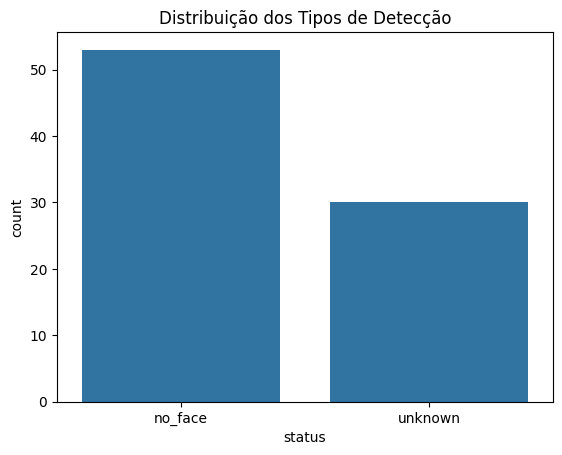

In [17]:
# Distribuição de status
sns.countplot(data=df, x='status')
plt.title('Distribuição dos Tipos de Detecção')
plt.show()

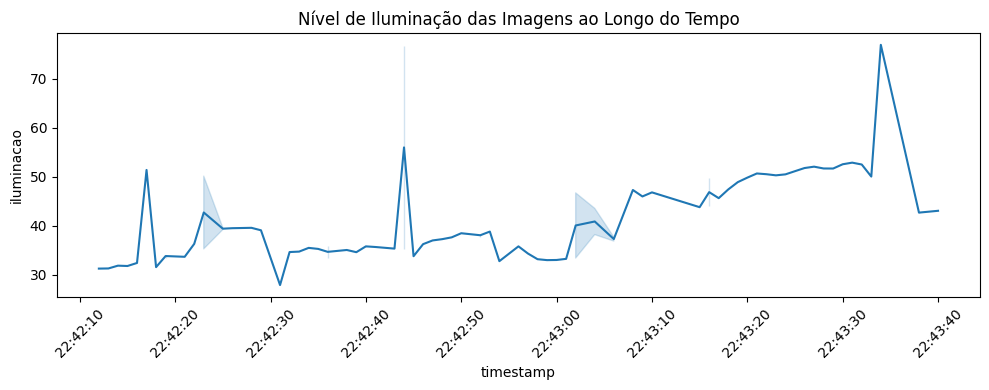

In [18]:
# Iluminação ao longo do tempo
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='timestamp', y='iluminacao')
plt.title('Nível de Iluminação das Imagens ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

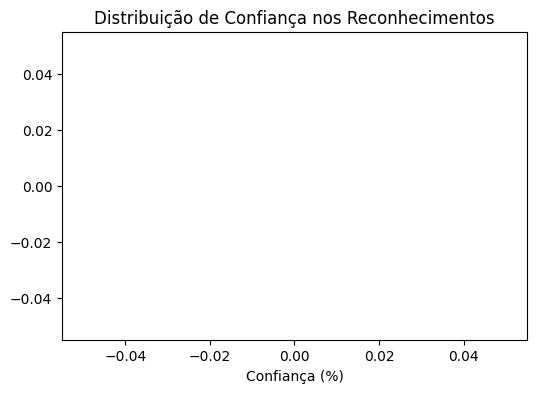

In [19]:
# Confiança dos reconhecimentos (quando disponível)
df_conf = df[df['confianca'].notnull()]
plt.figure(figsize=(6, 4))
sns.histplot(df_conf['confianca'], bins=10, kde=True)
plt.title('Distribuição de Confiança nos Reconhecimentos')
plt.xlabel('Confiança (%)')
plt.show()